# Timing hadamard_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `hadamard_real_dumb` , `hadamard_real_numpy`, `hadamard_real_numba` and `hadamard_real_parallel`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

### Timing for vectors

In [2]:
# number of elements forming the vectors
N_vec = np.array([100, 300, 500, 700, 1000, 1500, 2000, 5000, 10000])

In [3]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_parallel = []
for Ni in tq(N_vec):
    data = np.ones(Ni)
    # hadamard_real_dumb
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_dumb(data, data)
    list_time_dumb.append(time.average)
    # hadamard_real_numpy
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_numpy(data, data)
    list_time_numpy.append(time.average)
    # hadamard_real_numba
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_numba(data, data)
    list_time_numba.append(time.average)
    # hadamard_real_parallel
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_parallel(data, data)
    list_time_parallel.append(time.average)

72.7 µs ± 4.08 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.65 µs ± 385 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 2417.71 times longer than the fastest. This could mean that an intermediate result is being cached.
29.2 µs ± 277 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 172.30 times longer than the fastest. This could mean that an intermediate result is being cached.
160 µs ± 458 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
201 µs ± 27.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.17 µs ± 354 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.36 µs ± 249 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
114 µs ± 23.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
332 µs ± 24.9 µs per loop (mean ± std. dev. of 100 runs, 

In [4]:
list_vector_time_dumb = np.array(list_time_dumb)
list_vector_time_numpy = np.array(list_time_numpy)
list_vector_time_numba = np.array(list_time_numba)
list_vector_time_parallel = np.array(list_time_parallel)

### Timing for matrices

In [5]:
# number of elements forming the matrices
N_mat = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100])

In [6]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_parallel = []
for Ni in tq(N_mat):
    data = np.ones((Ni,Ni))
    # hadamard_real_dumb
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_dumb(data, data)
    list_time_dumb.append(time.average)
    # hadamard_real_numpy
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_numpy(data, data)
    list_time_numpy.append(time.average)
    # hadamard_real_numba
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_numba(data, data)
    list_time_numba.append(time.average)
    # hadamard_real_parallel
    time = %timeit -o -n 100 -r 100 fcs.hadamard_real_parallel(data, data)
    list_time_parallel.append(time.average)

351 µs ± 28.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.2 µs ± 404 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 1298.90 times longer than the fastest. This could mean that an intermediate result is being cached.
21.5 µs ± 196 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 262.81 times longer than the fastest. This could mean that an intermediate result is being cached.
189 µs ± 778 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
716 µs ± 26.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.64 µs ± 408 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.96 µs ± 249 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 8.51 times longer than the fastest. This could mean that an intermediate result is being cached.
110 µs ± 31.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.3 ms ± 57.8 µs per loop (mean ± std. dev. of 100 runs, 10

In [7]:
list_matrix_time_dumb = np.array(list_time_dumb)
list_matrix_time_numpy = np.array(list_time_numpy)
list_matrix_time_numba = np.array(list_time_numba)
list_matrix_time_parallel = np.array(list_time_parallel)

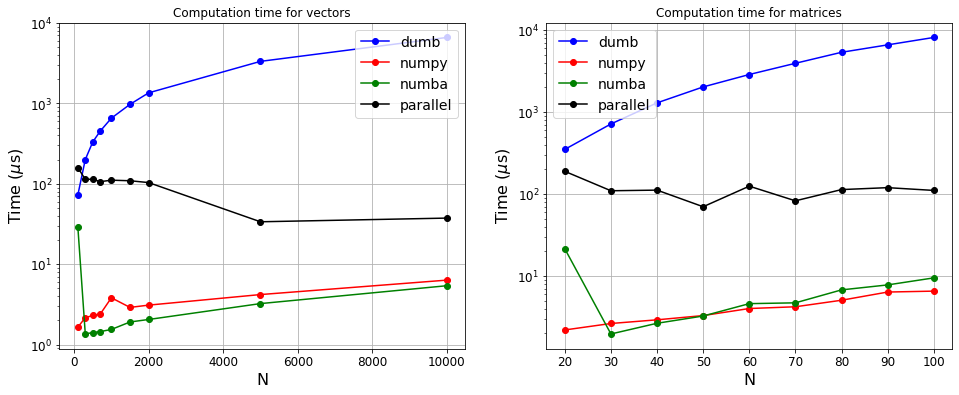

In [8]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Computation time for vectors')
plt.plot(N_vec, list_vector_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N_vec, list_vector_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N_vec, list_vector_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N_vec, list_vector_time_parallel*1e6, 'ko-', label = 'parallel')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()

plt.subplot(122)
plt.title('Computation time for matrices')
plt.plot(N_mat, list_matrix_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N_mat, list_matrix_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N_mat, list_matrix_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N_mat, list_matrix_time_parallel*1e6, 'ko-', label = 'parallel')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()

plt.show()